

# Reporte de problemas fitosanitarios en plantaciones de agave
--------------------

## Equipo 36

| Nombre | Matrícula |
| ------ | --------- |
| André Martins Cordebello | A00572928 |
| Enrique Eduardo Solís Da Costa | A00572678 |
| Delbert Francisco Custodio Vargas | A01795613 |

## Avance 1: análisis exploratorio de datos

Este primer avance consiste en realizar un análisis exploratorio de datos (EDA - Exploratory Data Analysis), es decir, describir los datos utilizando técnicas estadísticas y de visualización (análisis univariante y bi/multivariante) para hacer enfoque en sus aspectos más relevantes, así como aplicar y justificar operaciones de preprocesamiento, relacionadas con el manejo de valores faltantes, atípicos y alta cardinalidad. Es importante que incluyan sus conclusiones del EDA, identificando tendencias o relaciones importantes.

# EDA
--------------------------

## Cargando los datos

La CNIT compartió 2 archivos de Excel en los cuáles se encuentra el muestreo de la presencia de gorgojos del agave detectados por sensores conocidos como "trampas". Dichas trampas se encuentran esparcidas por el estado de Jalisco, el cual cuenta con presencia de operaciones de la CNIT.

En dichos datasets encontramos los siguientes tipos de datos:

| Dato | Tipo | ¿Qué significa? |
| ---- | ---- | --------------  |
| ID Trampa	Fecha Trampeo | Text | |
| Latitud | Float | |
| Longitud  | Float | |
| Municipio | Texto | |
| Superficie (Has) | Float | |
| Edad de la plantación en años | Entero | | 
| No. de Capturas | Entero | |
| Cebo | Texto | |
| Estado | Texto | |
| PAIS  | Texto | |
| UBICACIÓN | Texto | |
| SEMA | Texto | |
| Mun  | Texto | |
| Est  | Texto | |



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Carga de datasets

historic_captures_dataframe     = pd.read_excel( "Capturas_Picudo_2014_a_2024.xlsx", sheet_name="Datos", header= 0)
current_year_captures_dataframe = pd.read_excel("Capturas_Picudo_2025.xlsx", sheet_name="DB", header=0)

### Comparación de columnas
----------------------------

Al comparar las columnas que tiene cada dataset incluído, es posible notar que la columna `Empresa` de los datos del año  2025 no fue tomada en cuenta para el DataSet histórico que incluye información del 2014 al 2024. Por lo tanto, debemos preguntar a Luis Felipe y Axel si ellos pueden explicarnos la causa de que en muestreos anteriores esta información no existe.

In [3]:
print(f'El DataSet de capturas entre 2014 y 2024 tiene las siguientes columnas:\n\n{historic_captures_dataframe.columns}')
print("==============================================================\n")
print(f'El DataSet de capturas en el 2025 tiene las siguientes columnas:\n\n{current_year_captures_dataframe.columns}')

El DataSet de capturas entre 2014 y 2024 tiene las siguientes columnas:

Index(['ID Trampa', 'Fecha Trampeo', 'Latitud ', 'Longitud', 'Municipio',
       'Superficie (Has)', 'Edad de la plantación en años', 'No. de Capturas',
       'Cebo', 'Estado', 'PAIS', 'UBICACIÓN', 'SEMA', 'Mun Est'],
      dtype='object')

El DataSet de capturas en el 2025 tiene las siguientes columnas:

Index(['ID Trampa', 'Fecha Trampeo', 'Latitud ', 'Longitud', 'Municipio',
       'Superficie (Has)', 'Edad de la plantación en años', 'No. de Capturas',
       'Cebo', 'Estado', 'PAIS', 'UBICACIÓN', 'SEMA', 'Mun Est', 'Empresa'],
      dtype='object')


Por lo tanto, prematuramente estaremos ignorando esta columna hasta conocer más sobre el dataset por medio del apoyo de nuestro sponsor.

In [4]:
current_year_captures_dataframe.drop( columns= ['Empresa'], index=1, inplace=True)

Luego nos preparamos para unir los DataFrames...

In [5]:
all_historic_captures_df = pd.concat( [historic_captures_dataframe, current_year_captures_dataframe], ignore_index=True )
print("Columnas disponibles: " + str(all_historic_captures_df.columns) + "\n\n===================")

all_historic_captures_df.dtypes

Columnas disponibles: Index(['ID Trampa', 'Fecha Trampeo', 'Latitud ', 'Longitud', 'Municipio',
       'Superficie (Has)', 'Edad de la plantación en años', 'No. de Capturas',
       'Cebo', 'Estado', 'PAIS', 'UBICACIÓN', 'SEMA', 'Mun Est'],
      dtype='object')



ID Trampa                                object
Fecha Trampeo                    datetime64[ns]
Latitud                                 float64
Longitud                                float64
Municipio                                object
Superficie (Has)                        float64
Edad de la plantación en años           float64
No. de Capturas                         float64
Cebo                                     object
Estado                                   object
PAIS                                     object
UBICACIÓN                                object
SEMA                                     object
Mun Est                                  object
dtype: object

In [6]:
all_historic_captures_df.describe(include=["number"]).T

,count,mean,std,min,25%,50%,75%,max
Latitud,828120.0,20.642468,0.728738,18.987685,20.161839,20.597546,20.884595,23.439659
Longitud,828120.0,-102.755746,1.301064,-114.108837,-103.720535,-102.650350,-102.184024,-98.662612
Superficie (Has),849346.0,5.320690,14.194881,0.000000,0.000000,0.800000,4.060000,787.820000
Edad de la plantación en años,849346.0,2.453746,1.827056,0.000000,1.000000,2.000000,4.000000,19.000000
No. de Capturas,849610.0,4.306977,8.188936,0.000000,0.000000,2.000000,5.000000,427.000000


In [8]:
all_historic_captures_df.describe(exclude=["number"]).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
ID Trampa,849610.0,84466.0,716.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN
Fecha Trampeo,849610,NaN,NaN,NaN,2019-02-20 13:57:23.510316032,2014-01-01 00:00:00,2016-05-31 00:00:00,2017-12-05 00:00:00,2022-06-13 00:00:00,2025-08-31 00:00:00
Municipio,849610,282,Arandas,60869,NaN,NaN,NaN,NaN,NaN,NaN
Cebo,837368,7,Cebo alimenticio,617509,NaN,NaN,NaN,NaN,NaN,NaN
Estado,849610,9,JALISCO,331660,NaN,NaN,NaN,NaN,NaN,NaN
PAIS,849610,1,MEX,849610,NaN,NaN,NaN,NaN,NaN,NaN
UBICACIÓN,849610,406,"Arandas ,JALISCO ,MEX",60464,NaN,NaN,NaN,NaN,NaN,NaN
SEMA,849610,5,1-25,535703,NaN,NaN,NaN,NaN,NaN,NaN
Mun Est,849610,406,"Arandas ,JALISCO",60464,NaN,NaN,NaN,NaN,NaN,NaN


### Cambio de nombre en las columnas...

In [ ]:
all_historic_captures_df.rename( columns={
                                        'ID Trampa': 'Tramp_ID', 
                                        'Fecha Trampeo': 'Capture_Date', 
                                        'Latitud ': 'Lat',
                                        'Longitud' : 'Lon',
                                        'Municipio' : 'Municipality',
                                        'Superficie (Has)': 'Area',
                                        'Edad de la plantación en años': 'Plantation_Age',
                                        'No. de Capturas' : 'Capture_Count',
                                        'Cebo' : 'Bait',
                                        'Estado' : 'State',
                                        'PAIS' : 'Country',
                                        'UBICACIÓN' : 'Location',
                                        'SEMA' : 'Week',
                                        'Mun Est': 'Mun Est'},
                                
                                        inplace= True)

In [12]:
all_historic_captures_df.columns

Index(['Tramp_ID', 'Capture_Date', 'Lat', 'Lon', 'Municipality', 'Area',
       'Plantation_Age', 'Capture_Count', 'Bait', 'State', 'Country',
       'Location', 'Week', 'Mun Est'],
      dtype='object')

## Valores faltantes por columna o característica

Las únicas columnas donde contamos con valores faltantes son `Latitud`, `Longitud`, `Superficie`, `Edad de la plantación en años` y `Cebo`.

Con esto, el mayor porcentaje de valores faltantes se dió en las columnas `Latitud` y `Longitud`. 

In [ ]:
# Cantidad de registros con valores vacíos

missing_values_df = all_historic_captures_df.isnull().sum()
missing_values_df[missing_values_df > 0]

Lat               21490
Lon               21490
Area                264
Plantation_Age      264
Bait              12242
dtype: int64

In [ ]:
# Porcentaje de registros con valores vacíos

missing_values_perc_df = missing_values_df / all_historic_captures_df.count() * 100
missing_values_perc_df[missing_values_df > 0]

Lat               2.595035
Lon               2.595035
Area              0.031083
Plantation_Age    0.031083
Bait              1.461962
dtype: float64

## Debemos asegurarnos que todas las fechas sean válidas

In [ ]:
if all_historic_captures_df['Capture_Date'].dtype != 'datetime64[ns]':
    all_historic_captures_df['Capture_Date'] = pd.to_datetime(all_historic_captures_df['Capture_Date'])

# Aprovechamos a obtener las columnas de mes, año, mes-año y nombre del mes
all_historic_captures_df['Month']       = all_historic_captures_df['Capture_Date'].dt.month
all_historic_captures_df['Year']        = all_historic_captures_df['Capture_Date'].dt.year
all_historic_captures_df['MonthName']   = all_historic_captures_df['Capture_Date'].dt.strftime('%b')
all_historic_captures_df['MonthYear']   = all_historic_captures_df['Capture_Date'].dt.strftime('%Y-%m')

## Debemos validar que la edad de las plantaciones y el área sean válidas

In [71]:
if 'Plantation_Age' in all_historic_captures_df.columns:
        all_historic_captures_df['Age_Group'] = all_historic_captures_df['Plantation_Age'].apply(
                lambda x: int(x) if pd.notna(x) and isinstance(x, (int, float)) and x <= 7 else '8+' if pd.notna(x) and isinstance(x, (int, float)) 
                else 'Unknown')
        
if 'Area' in all_historic_captures_df.columns:
        bins = [0, 1, 2, 5, 10, 20, float('inf')]
        labels = ['<1', '1-2', '2-5', '5-10', '10-20', '>20']
        all_historic_captures_df['Surface_Group'] = pd.cut(all_historic_captures_df['Area'], bins=bins, labels=labels)

## Distribución de las capturas


Estadísticas sobre capturas:
count    849610.000000
mean          4.306977
std           8.188936
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max         427.000000
Name: Capture_Count, dtype: float64


Text(0, 0.5, 'Frecuencia')

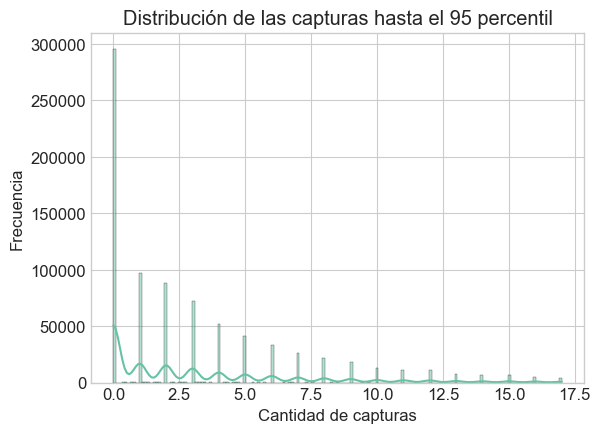

In [35]:
capture_stats = all_historic_captures_df['Capture_Count'].describe()
print("\nEstadísticas sobre capturas:")
print(capture_stats)

# Analisis de la distribucion
plt.figure(figsize=(14, 10))

# Histograma de capturas
plt.subplot(2, 2, 1)
p95 = np.percentile(all_historic_captures_df['Capture_Count'].dropna(), 95)
sns.histplot(all_historic_captures_df[all_historic_captures_df['Capture_Count'] <= p95]['Capture_Count'], kde=True)
plt.title(f'Distribución de las capturas hasta el 95 percentil')
plt.xlabel('Cantidad de capturas')
plt.ylabel('Frecuencia')


Estadísticas sobre capturas:
count    849610.000000
mean          4.306977
std           8.188936
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max         427.000000
Name: Capture_Count, dtype: float64


Text(0, 0.5, 'Frecuencia')

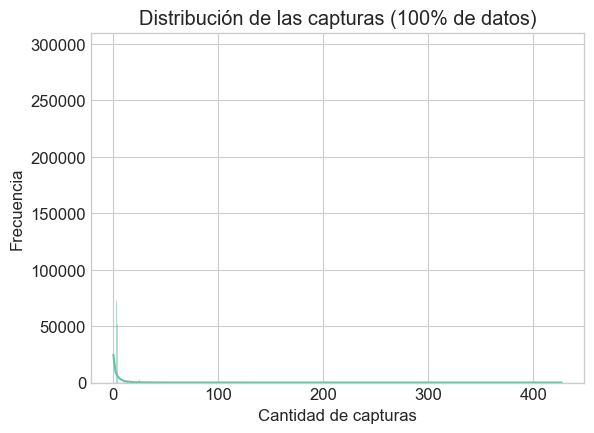

In [81]:
capture_stats = all_historic_captures_df['Capture_Count'].describe()
print("\nEstadísticas sobre capturas:")
print(capture_stats)

# Analisis de la distribucion
plt.figure(figsize=(14, 10))

# Histograma de capturas
plt.subplot(2, 2, 1)
sns.histplot(all_historic_captures_df['Capture_Count'], kde=True)
plt.title(f'Distribución de las capturas (100% de datos)')
plt.xlabel('Cantidad de capturas')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Cantidad de capturas')

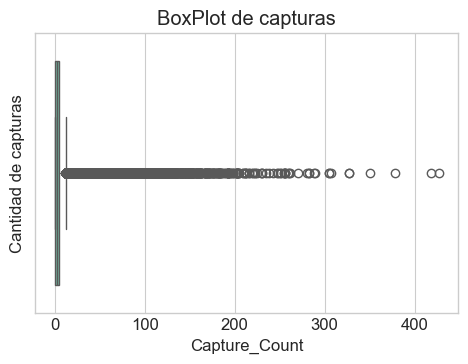

In [36]:
# BoxPlot sobre las capturas
plt.subplot(2, 2, 2)
sns.boxplot(x=all_historic_captures_df['Capture_Count'])
plt.title('BoxPlot de capturas')
plt.ylabel('Cantidad de capturas')

Text(0, 0.5, 'Cantidad de trampas')

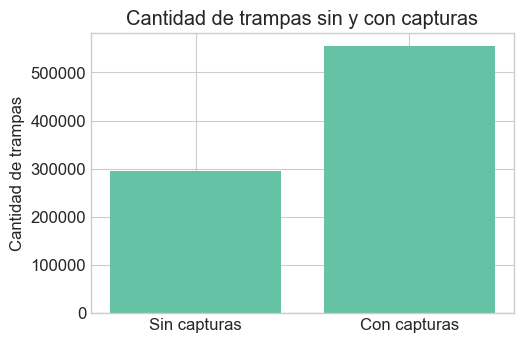

In [82]:
# Lugares con cero capturas vs. más de cero capturas

plt.subplot(2, 2, 3)

zero_captures = (all_historic_captures_df['Capture_Count'] == 0).sum()

more_than_zero_captures = (all_historic_captures_df['Capture_Count'] > 0).sum()


plt.bar(['Sin capturas', 'Con capturas'], [zero_captures, more_than_zero_captures])
plt.title('Cantidad de trampas sin y con capturas')
plt.ylabel('Cantidad de trampas')

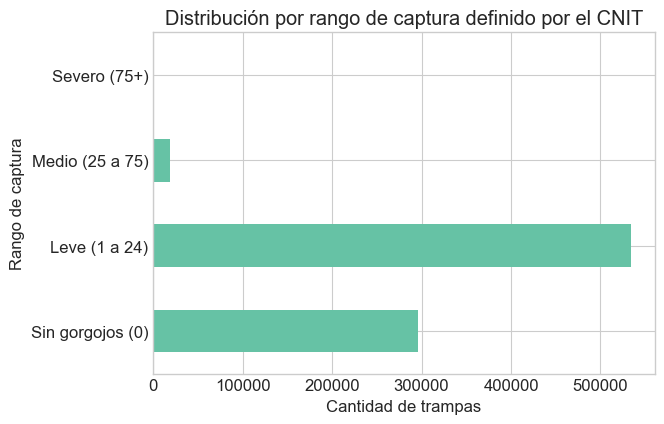

In [83]:
# Distribución de capturas en rangos definidos por el CNIT

plt.subplot(2, 2, 4)
bins = [0, 1, 25, 75, all_historic_captures_df['Capture_Count'].max() + 1]
labels = ["Sin gorgojos (0)", "Leve (1 a 24)", "Medio (25 a 75)", "Severo (75+)"]

capture_ranges = pd.cut(all_historic_captures_df['Capture_Count'], bins=bins, labels=labels, right=False)
range_counts = capture_ranges.value_counts().sort_index()

range_counts.plot.barh()
plt.title('Distribución por rango de captura definido por el CNIT')
plt.xlabel('Cantidad de trampas')
plt.ylabel('Rango de captura')

plt.tight_layout()

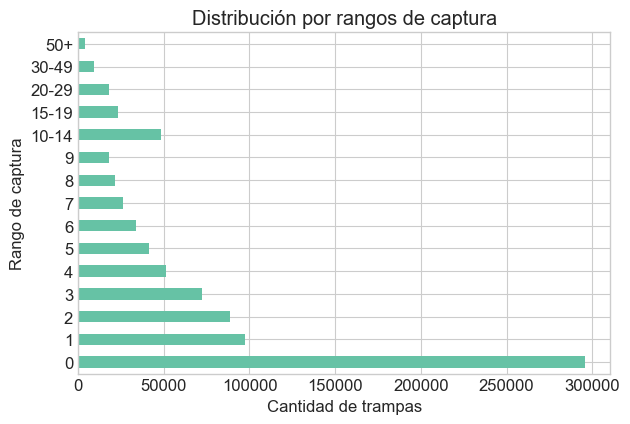

In [84]:
# Disitribución por bins aleatorios

plt.subplot(2, 2, 4)
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, all_historic_captures_df['Capture_Count'].max() + 1]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10-14', '15-19', '20-29', '30-49', '50+']

capture_ranges = pd.cut(all_historic_captures_df['Capture_Count'], bins=bins, labels=labels, right=False)
range_counts = capture_ranges.value_counts().sort_index()

# Plot horizontal bar chart
range_counts.plot.barh()
plt.title('Distribución por rangos de captura')
plt.xlabel('Cantidad de trampas')
plt.ylabel('Rango de captura')

plt.tight_layout()

## Análisis geográfico

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'ZAPOTITLÁN DE VADILLO'),
  Text(1, 0, 'TUXCACUESCO'),
  Text(2, 0, 'TONAYA'),
  Text(3, 0, 'SAN GABRIEL'),
  Text(4, 0, 'AMATITÁN'),
  Text(5, 0, 'TOLIMÁN'),
  Text(6, 0, 'AUTLÁN DE NAVARRO'),
  Text(7, 0, 'TECHALUTA DE MONTENEGRO'),
  Text(8, 0, 'EL LIMÓN'),
  Text(9, 0, 'TONILA'),
  Text(10, 0, 'SAN IGNACIO CERRO GORDO'),
  Text(11, 0, 'EL GRULLO'),
  Text(12, 0, 'PIHUAMO'),
  Text(13, 0, 'ZAPOTLÁN EL GRANDE'),
  Text(14, 0, 'EL ARENAL'),
  Text(15, 0, 'ROMITA'),
  Text(16, 0, 'MAGDALENA'),
  Text(17, 0, 'ATOYAC'),
  Text(18, 0, 'TEQUILA'),
  Text(19, 0, 'TAPALPA')])

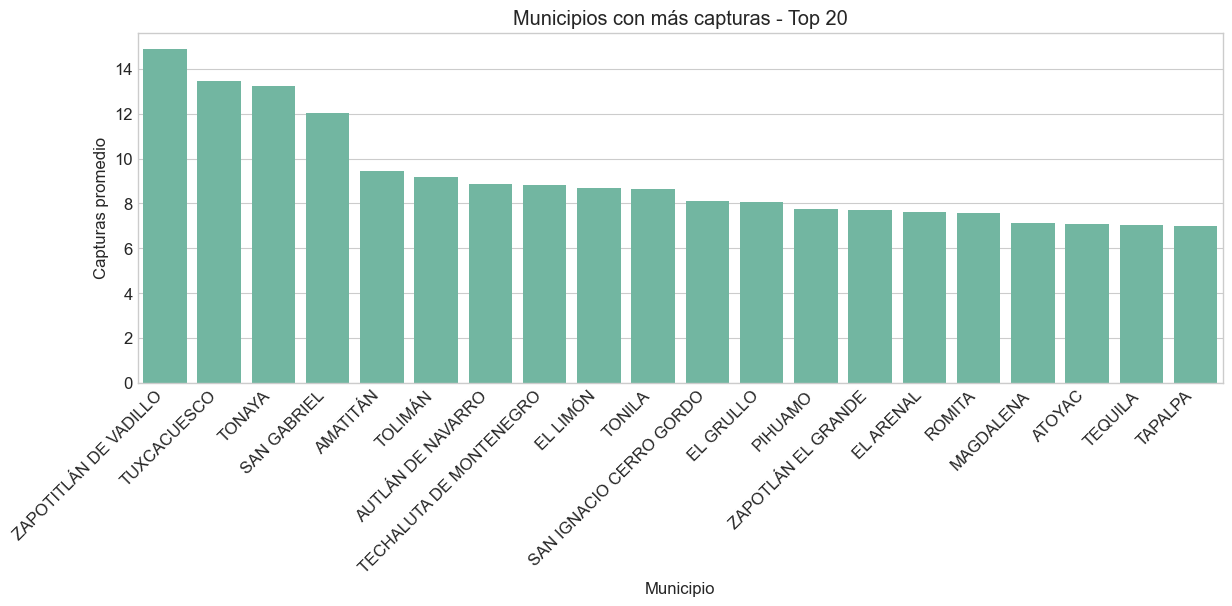

In [77]:
all_historic_captures_df['Municipality'] = all_historic_captures_df['Municipality'].str.upper()

municipality_data = all_historic_captures_df.groupby('Municipality').agg(
    avg_captures=('Capture_Count', 'mean'),
    max_captures=('Capture_Count', 'max'),
    total_captures=('Capture_Count', 'sum'),
    trap_count=('Capture_Count', 'count')
).sort_values('avg_captures', ascending=False)

significant_municipalities = municipality_data[municipality_data['trap_count'] >= 20]

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
top_municipalities = significant_municipalities.head(20)
sns.barplot(x=top_municipalities.index, y='avg_captures', data=top_municipalities.reset_index())
plt.title('Municipios con más capturas - Top 20')
plt.xlabel('Municipio')
plt.ylabel('Capturas promedio')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'ARANDAS'),
  Text(1, 0, 'ATOTONILCO EL ALTO'),
  Text(2, 0, 'JESÚS MARÍA'),
  Text(3, 0, 'PÉNJAMO'),
  Text(4, 0, 'AMATITÁN'),
  Text(5, 0, 'SANTA MARÍA DEL ORO'),
  Text(6, 0, 'ROMITA'),
  Text(7, 0, 'SAN PEDRO LAGUNILLAS'),
  Text(8, 0, 'TEPATITLÁN DE MORELOS'),
  Text(9, 0, 'LLERA'),
  Text(10, 0, 'AYOTLÁN'),
  Text(11, 0, 'JUCHITLÁN'),
  Text(12, 0, 'ZACOALCO DE TORRES'),
  Text(13, 0, 'TEQUILA'),
  Text(14, 0, 'SAN GABRIEL'),
  Text(15, 0, 'TUXPAN'),
  Text(16, 0, 'HUANÍMARO'),
  Text(17, 0, 'JIQUILPAN'),
  Text(18, 0, 'PIHUAMO'),
  Text(19, 0, 'ABASOLO')])

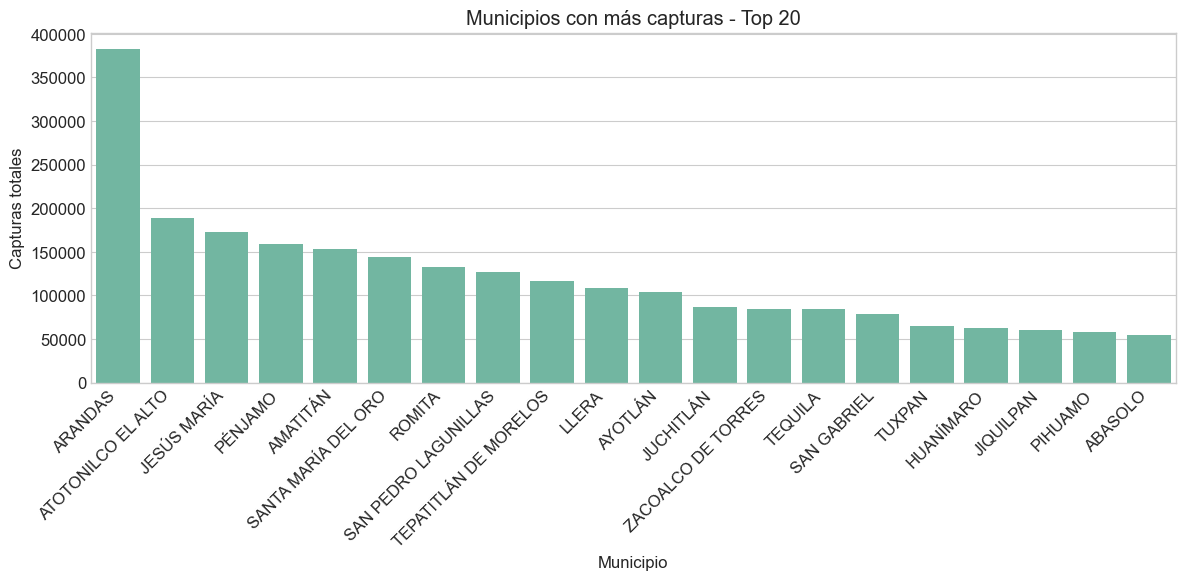

In [ ]:
municipality_data = municipality_data.sort_values("total_captures", ascending=False)
significant_municipalities = municipality_data[municipality_data['trap_count'] >= 20]

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
top_municipalities = significant_municipalities.head(20)
sns.barplot(x=top_municipalities.index, y='total_captures', data=top_municipalities.reset_index())
plt.title('Municipios con más capturas totales - Top 20')
plt.xlabel('Municipio')
plt.ylabel('Capturas totales')
plt.xticks(rotation=45, ha='right')


Capturas por Estado:
                     avg_captures  max_captures  total_captures  trap_count
State                                                                      
JALISCO                  5.401753         427.0    2.471464e+06      457530
MICHOACÁN DE OCAMPO      4.694345         113.0    2.372991e+04        5055
GUANAJUATO               4.663359         350.0    4.662800e+05       99988
NAYARIT                  3.525376         167.0    3.648694e+05      103498
TAMAULIPAS               3.418711         149.0    1.360100e+05       39784
MICHOACAN                1.369678         255.0    1.968980e+05      143755


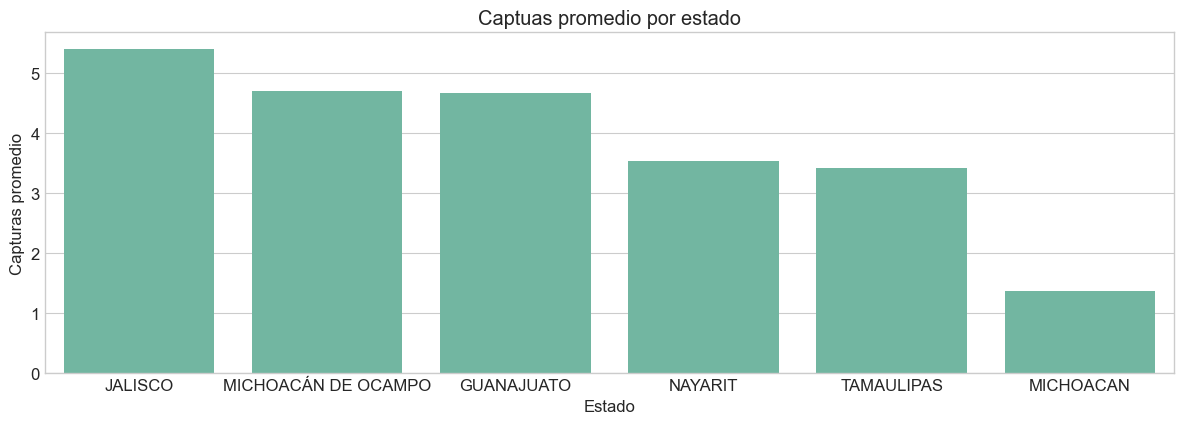

In [56]:
all_historic_captures_df['State'] = all_historic_captures_df['State'].str.upper()

state_data = all_historic_captures_df.groupby('State').agg(
        avg_captures=('Capture_Count', 'mean'),
        max_captures=('Capture_Count', 'max'),
        total_captures=('Capture_Count', 'sum'),
        trap_count=('Capture_Count', 'count')
    ).sort_values('avg_captures', ascending=False)
    
print("\nCapturas por Estado:")
print(state_data)
    
plt.subplot(2, 1, 2)
sns.barplot(x=state_data.index, y='avg_captures', data=state_data.reset_index())
plt.title('Captuas promedio por estado')
plt.xlabel('Estado')
plt.ylabel('Capturas promedio')

plt.tight_layout()

## Análisis temporal

In [58]:
# Por mes
monthly_data = all_historic_captures_df.groupby('Month').agg(
    avg_captures=('Capture_Count', 'mean'),
    max_captures=('Capture_Count', 'max'),
    total_captures=('Capture_Count', 'sum'),
    trap_count=('Capture_Count', 'count')
)

month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_data['MonthName'] = [month_names.get(m, m) for m in monthly_data.index]

print("\nPatrones de captura mensuales:")
print(monthly_data[['avg_captures', 'total_captures', 'trap_count']])


Patrones de captura mensuales:
       avg_captures  total_captures  trap_count
Month                                          
1          4.016854   231929.159221       57739
2          3.483718   201348.435005       57797
3          3.826563   207040.000000       54106
4          3.030772   173539.000000       57259
5          3.116691   196791.000000       63141
6          4.730448   309078.000000       65338
7          3.871677   291258.500000       75228
8          3.158089   271662.000000       86021
9          3.882932   331882.000000       85472
10         5.002816   440528.000000       88056
11         5.914425   498450.000000       84277
12         6.727480   505745.000000       75176


Text(0, 0.5, 'Promedio de capturas')

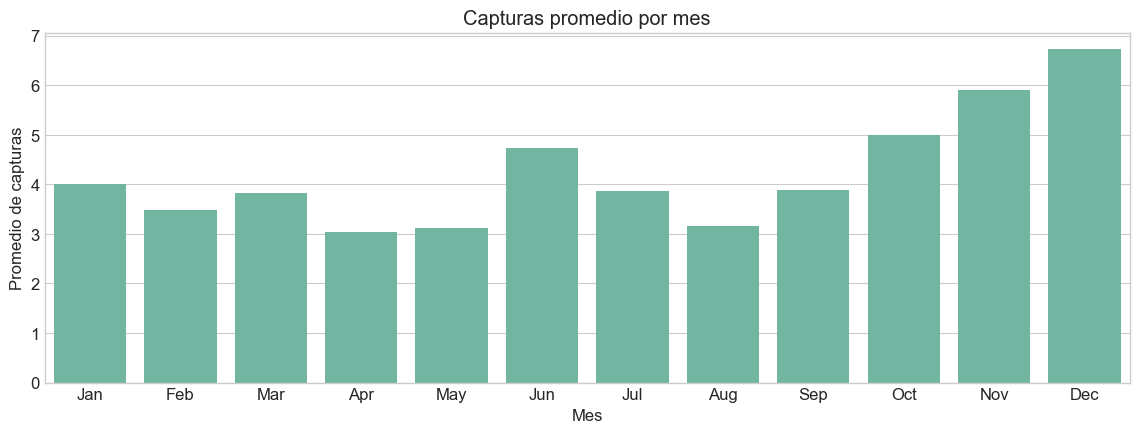

In [ ]:
# Por mes-año
monthly_trend = all_historic_captures_df.groupby('MonthYear').agg(
    avg_captures=('Capture_Count', 'mean'),
    total_captures=('Capture_Count', 'sum'),
    trap_count=('Capture_Count', 'count')
)

monthly_trend.index = pd.to_datetime(monthly_trend.index, format='%Y-%m')
monthly_trend = monthly_trend.sort_index()

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
month_order = list(range(1, 13))
month_data = monthly_data.reindex(month_order).reset_index()
sns.barplot(x='MonthName', y='avg_captures', data=month_data, order=[month_names[m] for m in month_order])
plt.title('Capturas promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de capturas')

Text(0, 0.5, 'Total de capturas')

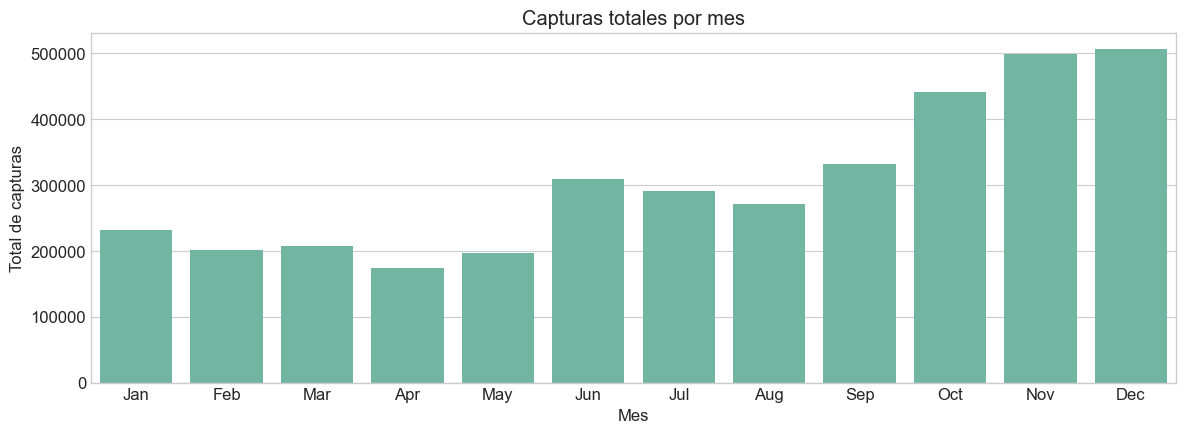

In [76]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
month_order = list(range(1, 13))
month_data = monthly_data.reindex(month_order).reset_index()
sns.barplot(x='MonthName', y='total_captures', data=month_data, order=[month_names[m] for m in month_order])
plt.title('Capturas totales por mes')
plt.xlabel('Mes')
plt.ylabel('Total de capturas')

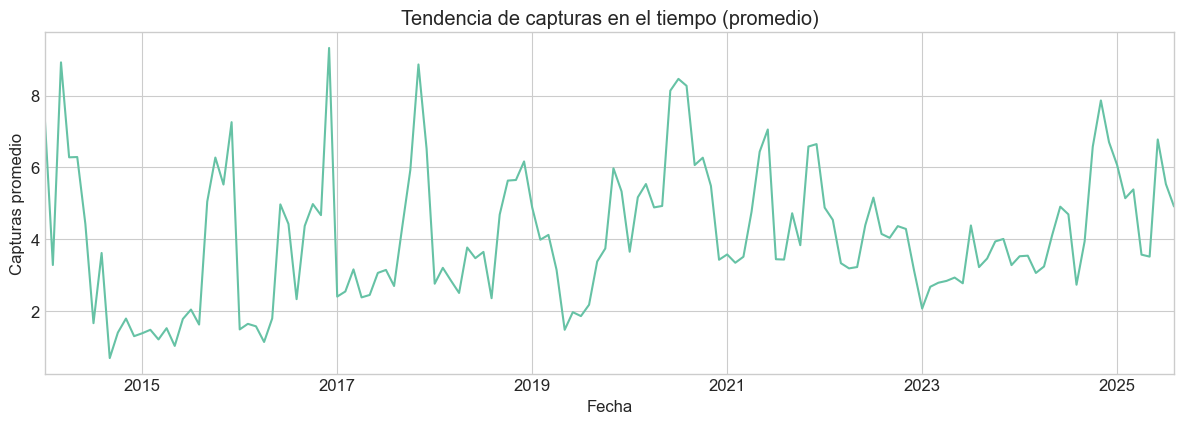

In [66]:
plt.subplot(2, 1, 2)
monthly_trend['avg_captures'].plot()
plt.title('Tendencia de capturas en el tiempo (promedio)')
plt.xlabel('Fecha')
plt.ylabel('Capturas promedio')
plt.grid(True)

plt.tight_layout()

In [73]:
# Por tiempo de registro del predio

def sort_order_for_age(x):
    
    try:
        return int(x)
    except:
        return 999 if x == '8+' else 0
    

if 'Age_Group' in all_historic_captures_df.columns:
    age_data = all_historic_captures_df.groupby('Age_Group').agg(
        avg_captures=('Capture_Count', 'mean'),
        max_captures=('Capture_Count', 'max'),
        total_captures=('Capture_Count', 'sum'),
        trap_count=('Capture_Count', 'count')
)
    
age_data = age_data.reset_index()
age_data = age_data.sort_values('Age_Group', key=lambda x: x.map(sort_order_for_age))

print("\nCapturas por antiguedad:")
print(age_data)


Capturas por antiguedad:
  Age_Group  avg_captures  max_captures  total_captures  trap_count
0         0      4.000194         350.0   617586.000000      154389
9   Unknown      4.545455          52.0     1200.000000         264
1         1      3.897998         427.0   474803.455556      121807
2         2      3.496341         209.0   630344.868488      180287
3         3      4.377226         307.0   698959.760209      159681
4         4      5.278593         255.0   582561.310761      110363
5         5      4.888870         261.0   379493.639819       77624
6         6      6.127327         288.0   214726.037172       35044
7         7      6.415558         418.0    36504.522222        5690
8        8+      5.171822         204.0    23071.500000        4461
